In [15]:
import numpy as np
import matplotlib.pyplot as plt
from learned_ctrlr_opt.utils.experiment_utils import *
import os
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline
colors = {"OCCAM (Context-Only)": "C3",
         "OCCAM (No-Meta)": "C3",
          "OCCAM (Ours)": "C3",
         "Reptile [51]": "C0",
         "LK-GP": "C2",
         "Nominal": "C7",
         "F-PACOH": "C2"}
styles = {"OCCAM (Context-Only)":"dotted",
         "OCCAM (No-Meta)": "dashed",
         "OCCAM (Ours)": "solid",
         "LK-GP": "solid",
         "Nominal":"solid",
         "F-PACOH": "solid",
         "Reptile [51]": "solid"}

sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate Robotic System Figures

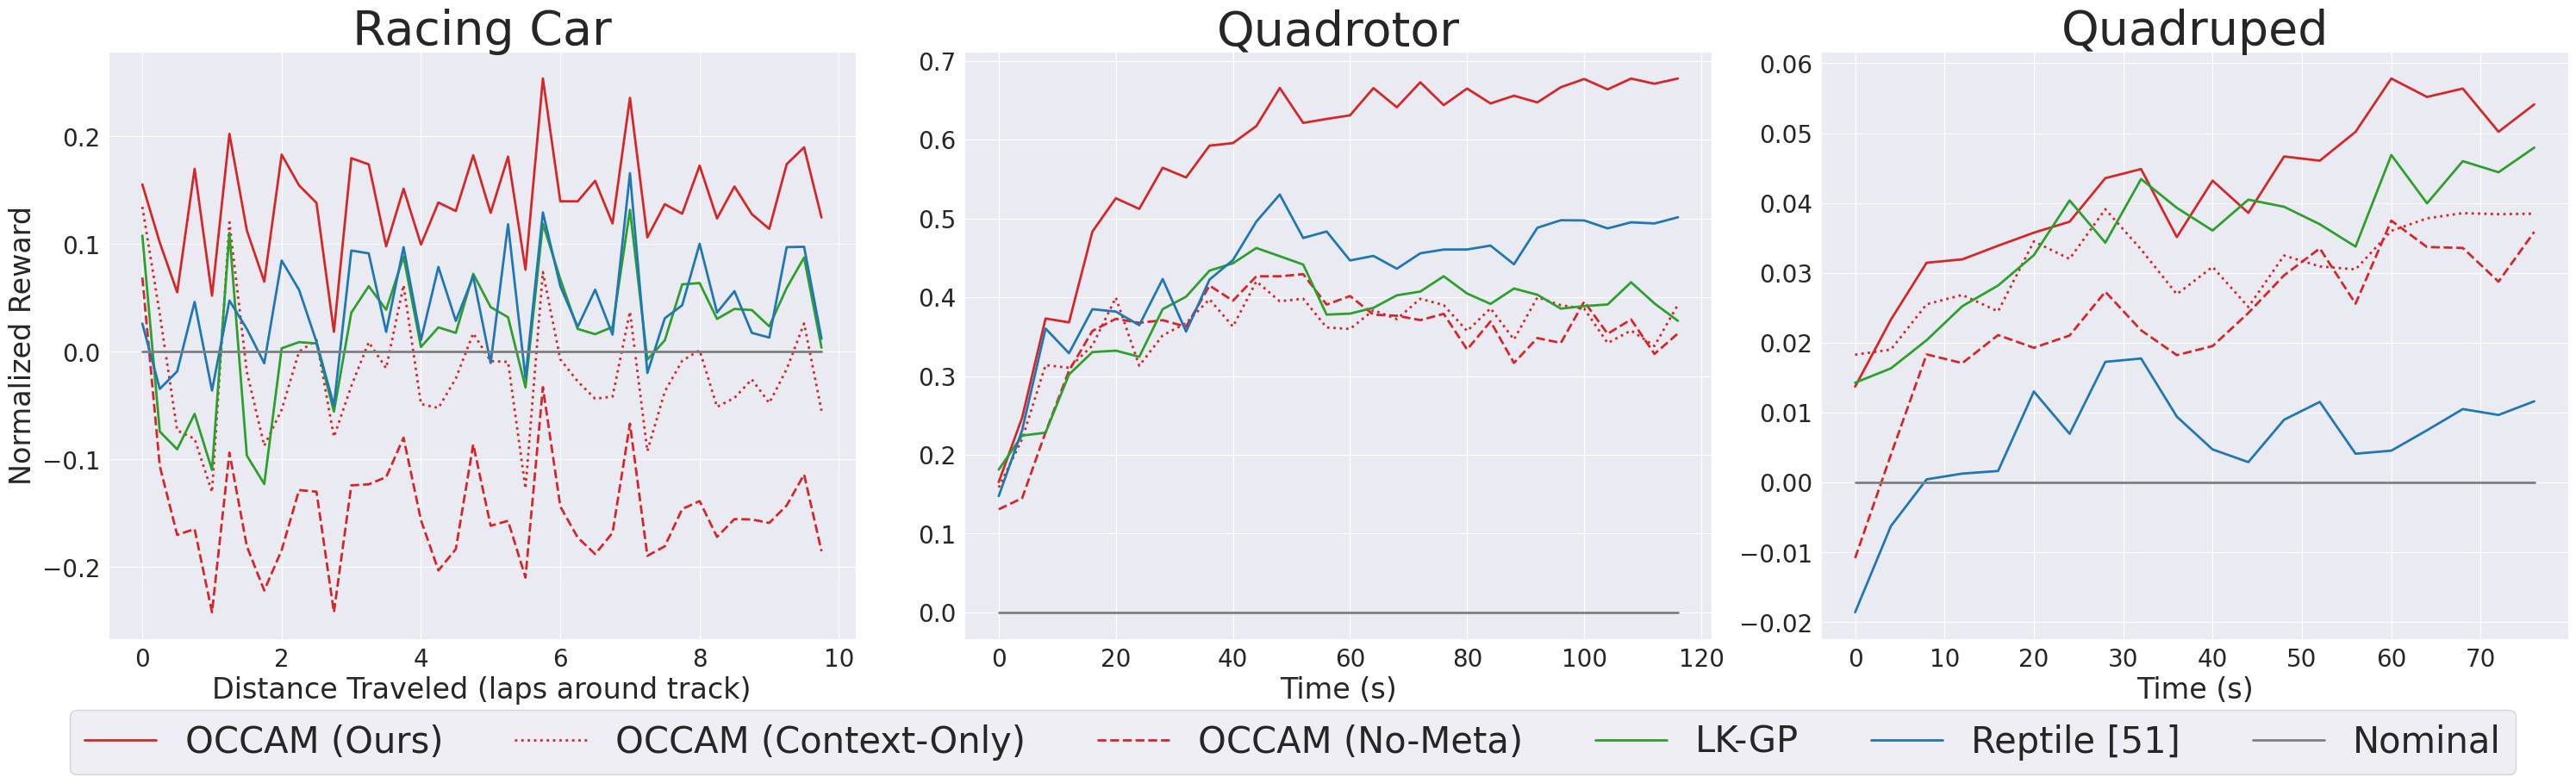

In [13]:
robot_supfig, robot_supax = plt.subplots(1,3, figsize=(30,9))

test_set_name = "ood_tasks_4"
robot_name = "topdowncar"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
    
# idxs = [5, 0, 3, 2, 1, 4]
# labels = ["Ours", "Ours (No-Adapt)", "Ours (No-Meta)", "LK-GP", "Reptile [60]", "Nominal"]

# result_idxs = [(132,132+8),
#                 (100,108),
#               (100,108),
#               (100,108),
#               (100,108),
#               (100,108)]

idxs = [8, 0, 4, 2, 1, 6]
labels = ["OCCAM (Ours)", "OCCAM (Context-Only)", "OCCAM (No-Meta)", "LK-GP", "Reptile [51]", "Nominal"]

result_idxs = [(132,132+8),
                (100,108),
              (100,108),
              (100,108),
              (100,108),
              (100,108)]


all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas

keys = ["actual_costs"]

nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()
tdc_x_axis = [(75*i)/300 for i in range(len(nom_ac))]
for i, label in enumerate(labels):
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    line = sns.lineplot(x=tdc_x_axis,
                        y=mean_actual_costs-nom_ac, 
                        ax=robot_supax[0], 
                        c=colors[label], 
                        linestyle=styles[label], 
                        linewidth=2,
                       label=label)
    
robot_supax[0].get_legend().remove()
###
test_set_name = "ood_params_1"
robot_name = "crazyflie"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))

idxs = [6, 0, 5, 4, 9, 8] # 1, 2]

result_idxs = [(108,108+8),
                (108,108+8),
#                (3000, 3005),
               (108,108+8),
               (108, 108+8),
              (108,108+8),
              (100,100+8)]

# idxs = [4, 0, 3, 2, 7, 6]
# result_idxs = [(108,108+8),
#                 (108,108+8),
#                (108,108+8),
#                (108, 108+8),
#               (108,108+8),
#               (100,100+8)]

all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas


keys = ["actual_costs"]
nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_actual_costs = nom_results["actual_costs"].squeeze()
quad_x_axis = [4*i for i in range(len(nom_actual_costs))]
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    line = sns.lineplot(x=quad_x_axis, y=mean_actual_costs-nom_actual_costs, ax=robot_supax[1], c=colors[label], linestyle=styles[label], linewidth=2)


###
test_set_name = "ood_params_3"
robot_name = "mob_loco"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
idxs = [7, 4, 2, 3, 1, 6]
result_idxs = [(8,16),
                (8,16),
               (8,16),
              (0,8),
              (0,8),
               (0,8),
              (0,8),
              (0,8)]

# idxs = [5, 3, 1, 2, 0, 4]
# result_idxs = [(8,16),
#                 (8,16),
#                (8,16),
#               (0,8),
#               (0,8),
#                (0,8)]


all_results = {}
all_failures = {}
for j, idx in enumerate(idxs):
    results = []
    other_datas = []
    for i in range(result_idxs[j][0], result_idxs[j][1]):
        result, fail = load_experiment_data(robot_name, model_names[idx], i, test_set_name)
        results.append(result)
        other_datas.append(fail)
    all_results[labels[j]] = results
    all_failures[labels[j]] = other_datas


keys = ["actual_costs", "expected_costs"]
nom_results, nom_var_results, nom_mttf = get_mean_std_filter_launch_fails(all_results["Nominal"], keys, 2)
nom_ac = nom_results["actual_costs"].squeeze()
loco_x_axis = [4*i for i in range(len(nom_ac))]
for label in labels:
    mean_results, var_results, mttf = get_mean_std_filter_launch_fails(all_results[label], keys, 2)
    mean_actual_costs = mean_results["actual_costs"].squeeze()
    var_actual_costs = var_results["actual_costs"].squeeze()
    
    line = sns.lineplot(x=loco_x_axis, 
                        y=mean_actual_costs-nom_ac, 
                        ax=robot_supax[2], 
                        c=colors[label], 
                        linestyle=styles[label], 
                        linewidth=2)

title_fontsize=40
label_fontsize=24
robot_supax[0].set_title("Racing Car", fontsize=title_fontsize)
robot_supax[0].set_ylabel("Normalized Reward", fontsize=label_fontsize)
robot_supax[0].set_xlabel("Distance Traveled (laps around track)", fontsize=label_fontsize)
robot_supax[1].set_title("Quadrotor", fontsize=title_fontsize)
# robot_supax[1].set_ylabel("Normalized Reward", fontsize=label_fontsize)
robot_supax[1].set_xlabel("Time (s)", fontsize=label_fontsize)
robot_supax[2].set_title("Quadruped", fontsize=title_fontsize)
robot_supax[2].set_xlabel("Time (s)", fontsize=label_fontsize)
# robot_supax[2].set_ylabel("Normalized Reward", fontsize=label_fontsize)
for ax in robot_supax:
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
robot_supfig.tight_layout()
robot_supfig.subplots_adjust(bottom=0.17)
lines_labels = [robot_supax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = robot_supfig.legend(lines, labels, ncol=6, loc="lower center", fontsize=30, bbox_to_anchor=(0.5, -0.020))
plt.savefig("paper_figures/all_robot_curves_updated_corl.png",bbox_extra_artists=(lgd,), bbox_inches='tight')

# Generate Benchmark Figures

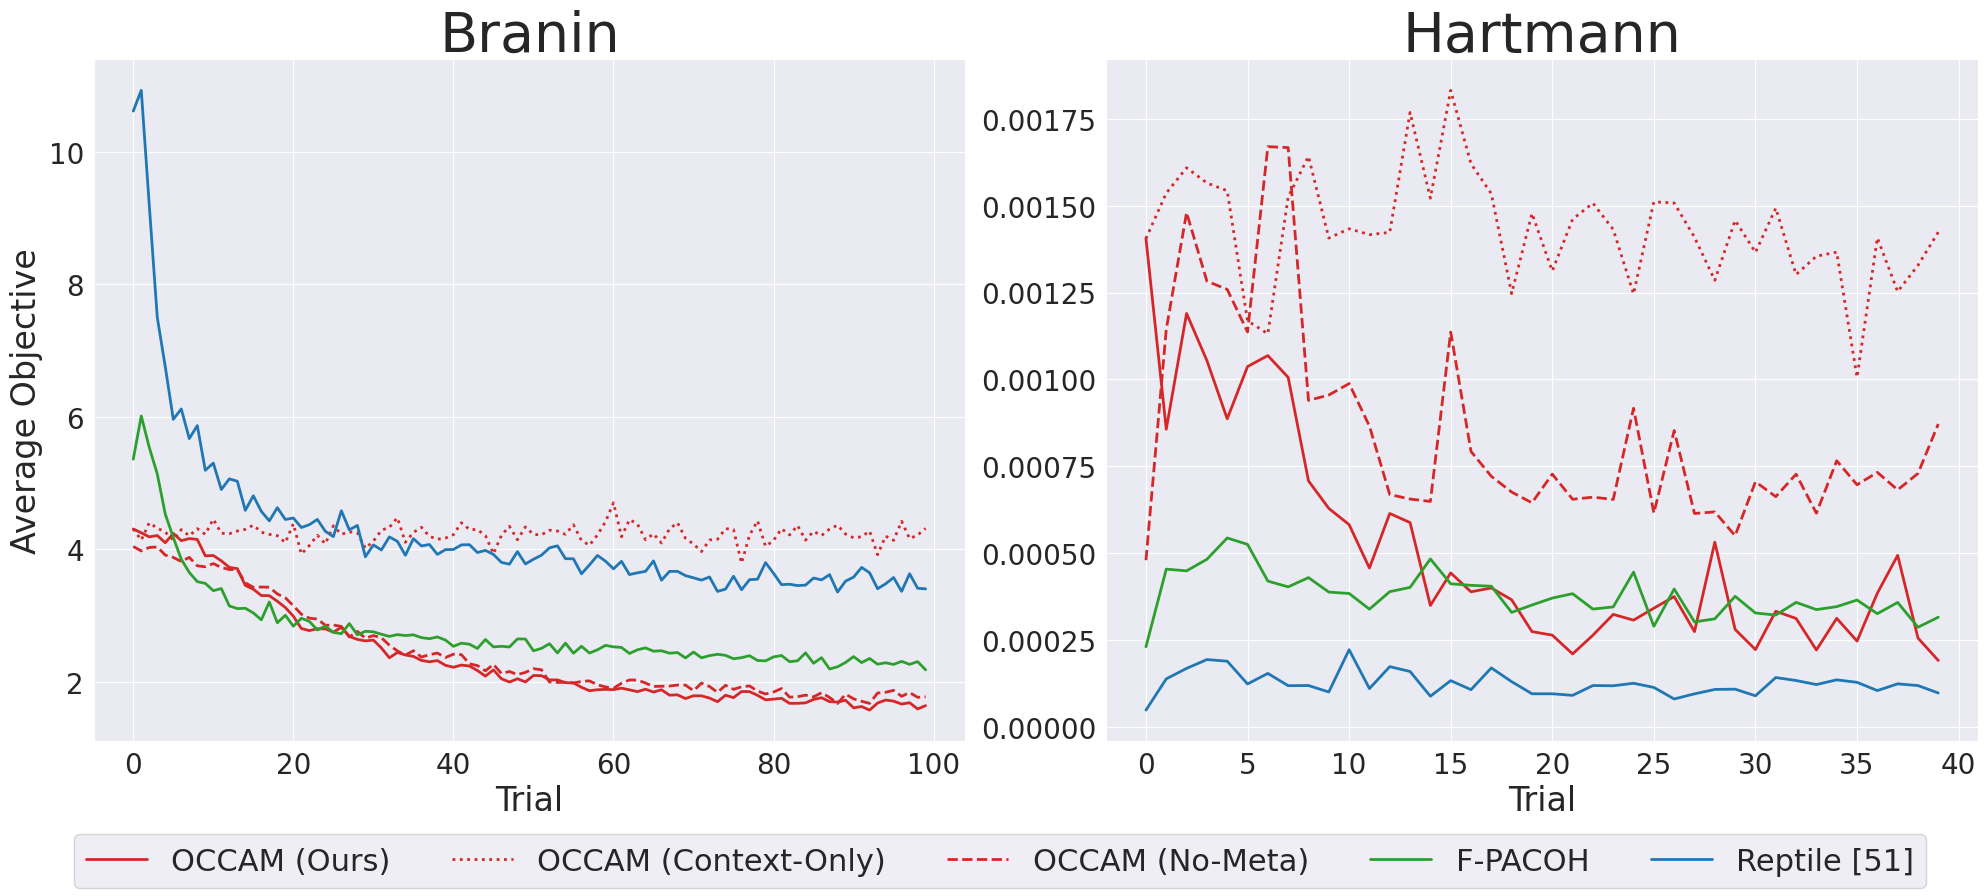

In [16]:
test_set_name = "ood_params_1"
robot_name = "meta_branin"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))

kf_name = model_names[5]
kf_results = []
kf_failures = []
for i in range(5,15):
    results, fails = load_experiment_data(robot_name, kf_name, i, test_set_name)
    kf_results.append(results)
    kf_failures.append(fails)
    
noadapt_name = model_names[1]
noadapt_results = []
noadapt_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, noadapt_name, i, test_set_name)
    noadapt_results.append(results)
    noadapt_failures.append(fails)


reptile_name = model_names[-1]
reptile_results = []
reptile_failures = []
for i in range(10, 20):
    results, fails = load_experiment_data(robot_name, reptile_name, i, test_set_name)
    reptile_results.append(results)
    reptile_failures.append(fails)
    
fpacoh_gain_name = model_names[0]
fpacoh_results = []
fpacoh_failures = []
for i in range(5, 15):
    results, fails = load_experiment_data(robot_name, fpacoh_gain_name, i, test_set_name)
    fpacoh_results.append(results)
    fpacoh_failures.append(fails)
    
nometa_name = model_names[3]
nometa_results = []
nometa_failures = []
for i in range(10):
    results, fails = load_experiment_data(robot_name, nometa_name, i, test_set_name)
    nometa_results.append(results)
    nometa_failures.append(fails)

keys = ["expected_costs", "actual_costs", "expected_variances"]
mean_kf_results = get_mean_across_multiple_dicts(kf_results, keys)
mean_nometa_results = get_mean_across_multiple_dicts(nometa_results, keys)
mean_reptile_results = get_mean_across_multiple_dicts(reptile_results, ["expected_costs", "actual_costs"])
mean_fpacoh_results = get_mean_across_multiple_dicts(fpacoh_results, ["expected_costs", "actual_costs"])

mean_actual_costs_kf = np.mean(mean_kf_results["actual_costs"], axis=(0)).squeeze()
mean_actual_costs_fpacoh = np.mean(mean_fpacoh_results["actual_costs"], axis=(0)).squeeze()
mean_actual_costs_nometa = np.mean(mean_nometa_results["actual_costs"], axis=(0)).squeeze()

mean_expected_costs_kf = np.mean(mean_kf_results["expected_costs"], axis=(0)).squeeze()
mean_expected_variances_kf = np.mean(mean_kf_results["expected_variances"], axis=(0)).squeeze()
mean_actual_costs_reptile = np.mean(mean_reptile_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_reptile = np.mean(mean_reptile_results["expected_costs"], axis=(0)).squeeze()

var_actual_costs_kf = np.mean(get_vars_across_multiple_dicts(kf_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))
var_actual_costs_nometa = np.mean(get_vars_across_multiple_dicts(nometa_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

var_actual_costs_reptile = np.mean(get_vars_across_multiple_dicts(reptile_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                                   axis=(0))
var_actual_costs_fpacoh = np.mean(get_vars_across_multiple_dicts(fpacoh_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

mean_noadapt_results = get_mean_across_multiple_dicts(noadapt_results, keys)
mean_actual_costs_noadapt = np.mean(mean_noadapt_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_noadapt = np.mean(mean_noadapt_results["expected_costs"], axis=(0)).squeeze()
mean_expected_variances_noadapt = np.mean(mean_noadapt_results["expected_variances"], axis=(0)).squeeze()
var_actual_costs_noadapt = np.mean(get_vars_across_multiple_dicts(noadapt_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze(),
                              axis=(0))

linewidth=2
bench_supfig, bench_supax = plt.subplots(1,2, figsize=(20,9))

line_kf = bench_supax[0].plot(mean_actual_costs_kf, 
                              linewidth=linewidth, 
                              c=colors["OCCAM (Ours)"], 
                              linestyle=styles["OCCAM (Ours)"],
                             label="OCCAM (Ours)")
line_noadapt = bench_supax[0].plot(mean_actual_costs_noadapt, linewidth=linewidth, c=colors["OCCAM (Context-Only)"], linestyle=styles["OCCAM (Context-Only)"],
                                  label="OCCAM (Context-Only)")
line_nometa = bench_supax[0].plot(mean_actual_costs_nometa,linewidth=linewidth, c=colors["OCCAM (No-Meta)"], linestyle=styles["OCCAM (No-Meta)"],
                                 label="OCCAM (No-Meta)")
line_pacoh = bench_supax[0].plot(mean_actual_costs_fpacoh, linewidth=linewidth, c=colors["F-PACOH"], linestyle=styles["F-PACOH"],
                                label="F-PACOH")
line_reptile = bench_supax[0].plot(mean_actual_costs_reptile,linewidth=linewidth, c=colors["Reptile [51]"], linestyle=styles["Reptile [51]"],
                                  label="Reptile [51]")

labels = ["OCCAM (Ours)", "OCCAM (Context-Only)", "OCCAM (No-Meta)", "Reptile [51]", "F-PACOH"]
lines = [line_kf, line_noadapt, line_nometa, line_pacoh, line_reptile]

###
test_set_name = "ood_params_1"
robot_name = "meta_hartmann"
model_names = os.listdir(os.path.join(EXPERIMENT_RESULTS_FOLDER, robot_name, test_set_name))
kf_name = model_names[2]
kf_results = []
kf_failures = []
for i in range(0,10):
    results, fails = load_experiment_data(robot_name, kf_name, i, test_set_name)
    kf_results.append(results)
    kf_failures.append(fails)

nometa_name = model_names[4]
nometa_results = []
nometa_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, nometa_name, i, test_set_name)
    nometa_results.append(results)
    nometa_failures.append(fails)

lkbo_name = model_names[3]
lkbo_results = []
for i in range(0,10):
    results, fails = load_experiment_data(robot_name, lkbo_name, i, test_set_name)
    lkbo_results.append(results)
    
no_adapt = model_names[1]
no_adapt_results = []
no_adapt_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, no_adapt, i, test_set_name)
    no_adapt_results.append(results)
    no_adapt_failures.append(fails)

reptile_name = model_names[5]
reptile_results = []
reptile_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, reptile_name, i, test_set_name)
    reptile_results.append(results)
    reptile_failures.append(fails)
    
fpacoh_gain_name = model_names[0]
fpacoh_results = []
fpacoh_failures = []
for i in range(0, 10):
    results, fails = load_experiment_data(robot_name, fpacoh_gain_name, i, test_set_name)
    fpacoh_results.append(results)
    fpacoh_failures.append(fails)

keys = ["expected_costs", "actual_costs", "expected_variances"]
mean_kf_results = get_mean_across_multiple_dicts(kf_results, keys)
mean_actual_costs_kf = np.mean(mean_kf_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_kf = np.mean(np.sqrt(get_vars_across_multiple_dicts(kf_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_noadapt_results = get_mean_across_multiple_dicts(no_adapt_results, keys)
mean_actual_costs_noadapt = np.mean(mean_noadapt_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_noadapt = np.mean(np.sqrt(get_vars_across_multiple_dicts(no_adapt_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_nometa_results = get_mean_across_multiple_dicts(nometa_results, keys)
mean_actual_costs_nometa = np.mean(mean_nometa_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_nometa = np.mean(np.sqrt(get_vars_across_multiple_dicts(nometa_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_reptile_results = get_mean_across_multiple_dicts(reptile_results, ["expected_costs", "actual_costs"])
mean_actual_costs_reptile = np.mean(mean_reptile_results["actual_costs"], axis=(0)).squeeze()
mean_expected_costs_reptile = np.mean(mean_reptile_results["expected_costs"], axis=(0)).squeeze()
var_actual_costs_reptile = np.mean(np.sqrt(get_vars_across_multiple_dicts(reptile_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                                   axis=(0))

mean_fpacoh_results = get_mean_across_multiple_dicts(fpacoh_results, ["expected_costs", "actual_costs"])
mean_actual_costs_fpacoh = np.mean(mean_fpacoh_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_fpacoh = np.mean(np.sqrt(get_vars_across_multiple_dicts(fpacoh_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))

mean_lkbo_results = get_mean_across_multiple_dicts(lkbo_results, ["expected_costs", "actual_costs"])
mean_actual_costs_lkbo = np.mean(mean_lkbo_results["actual_costs"], axis=(0)).squeeze()
var_actual_costs_lkbo = np.mean(np.sqrt(get_vars_across_multiple_dicts(lkbo_results, ["actual_costs"], axes=(0))["actual_costs"].squeeze()),
                              axis=(0))


line_kf = bench_supax[1].plot(mean_actual_costs_kf, linewidth=2, c=colors["OCCAM (Ours)"], linestyle=styles["OCCAM (Ours)"])
line_reptile = bench_supax[1].plot(mean_actual_costs_reptile, linewidth=2, c=colors["Reptile [51]"], linestyle=styles["Reptile [51]"])
line_pacoh = bench_supax[1].plot(mean_actual_costs_fpacoh, linewidth=2, c=colors["F-PACOH"], linestyle=styles["F-PACOH"])
line_noadapt = bench_supax[1].plot(mean_actual_costs_noadapt, linewidth=2, c=colors["OCCAM (Context-Only)"], linestyle=styles["OCCAM (Context-Only)"])
line_nometa = bench_supax[1].plot(mean_actual_costs_nometa, linewidth=2, c=colors["OCCAM (No-Meta)"], linestyle=styles["OCCAM (No-Meta)"])

title_fontsize=40
label_fontsize=24

bench_supax[0].set_title("Branin", fontsize=title_fontsize)
bench_supax[0].set_ylabel("Average Objective", fontsize=label_fontsize)
bench_supax[0].set_xlabel("Trial", fontsize=label_fontsize)
bench_supax[1].set_title("Hartmann", fontsize=title_fontsize)
bench_supax[1].set_xlabel("Trial", fontsize=label_fontsize)
for ax in bench_supax:
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    
bench_supfig.tight_layout()
bench_supfig.subplots_adjust(bottom=0.17)
lines_labels = [bench_supax[0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
lgd = bench_supfig.legend(lines, labels, ncol=6, loc="lower center", fontsize=22, bbox_to_anchor=(0.5, -0.008))
plt.savefig("paper_figures/bench_curves_updated_corl.png")